In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


# Загрузка данных

In [42]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx


In [43]:
data = pd.read_excel('data_ford_price.xlsx') 


# Трансформация признаков

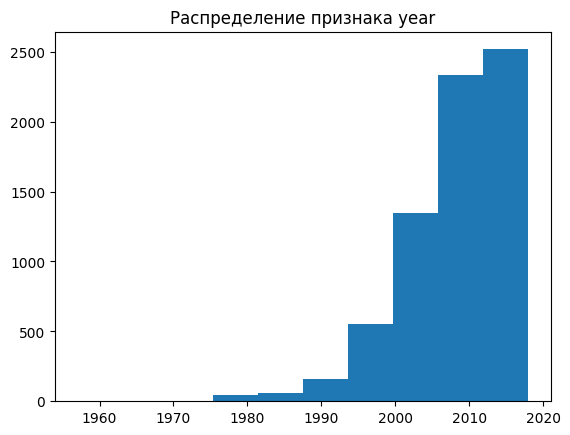

In [44]:
plt.hist(data.year)
plt.title('Распределение признака year');


## Квантильное преобразование

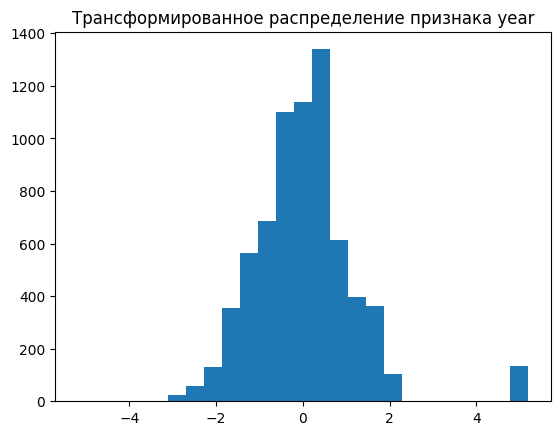

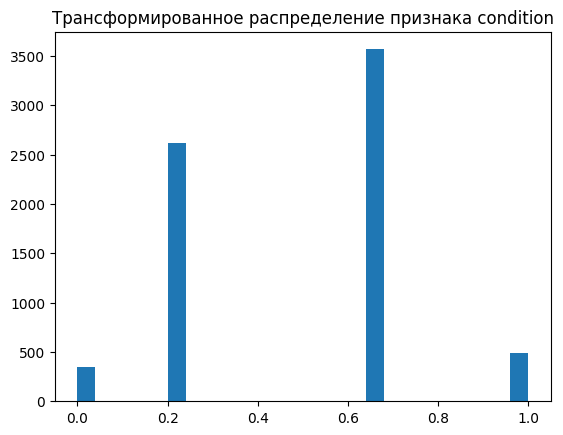

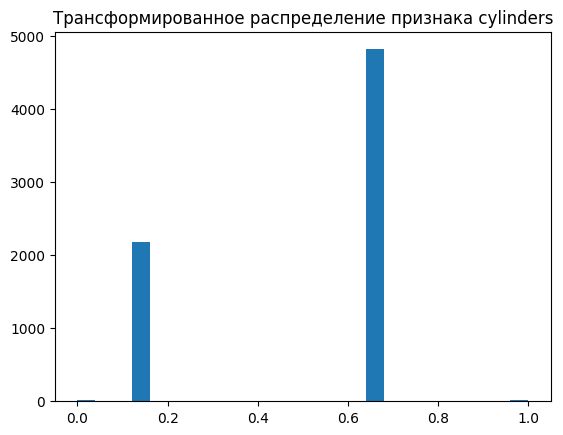

In [45]:
data_for_transform_y = data['year'].values.reshape((len(data),1))
data_for_transform_con = data['condition'].values.reshape((len(data),1))
data_for_transform_cyl = data['cylinders'].values.reshape((len(data),1))
 
quantile_n = QuantileTransformer(output_distribution='normal')
quantile_u = QuantileTransformer(output_distribution='uniform')
data_transformed_y = quantile_n.fit_transform(data_for_transform_y)
data_transformed_con = quantile_u.fit_transform(data_for_transform_con)
data_transformed_cyl = quantile_u.fit_transform(data_for_transform_cyl)
 
plt.hist(data_transformed_y, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

plt.hist(data_transformed_con, bins=25)
plt.title('Трансформированное распределение признака condition')
plt.show()

plt.hist(data_transformed_cyl, bins=25)
plt.title('Трансформированное распределение признака cylinders')
plt.show()


In [46]:
data_transformed_con[0].round(2)


array([0.96])

## Логарифмическое преобразование

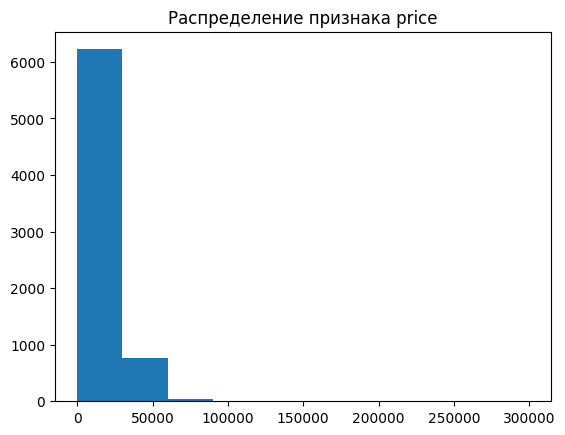

In [47]:
plt.hist(data.price)
plt.title('Распределение признака price');


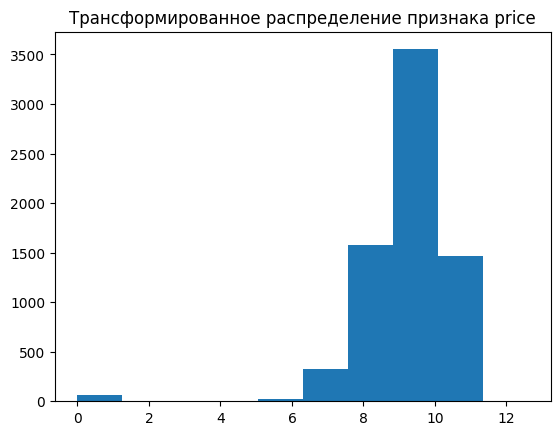

In [48]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()


In [49]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)
 
price_data.describe()


,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


In [50]:
price_data['transformed_price'].tail(1).round(2)


7016    9.8
Name: transformed_price, dtype: float64

## Преобразование Бокса-Кокса

In [51]:
box_cox = PowerTransformer(method = 'box-cox')
 
data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])


C:\Users\NoName\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_morestats.py:1120: UserWarning: The optimal lambda is 123.77792357708721, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in float64.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)
C:\Users\NoName\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1159: RuntimeWarning: overflow encountered in square
  temp **= 2
C:\Users\NoName\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1165: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\NoName\AppData\Local\Packages\PythonSoftwa

C:\Users\NoName\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\axes\_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\NoName\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\axes\_axes.py:6974: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

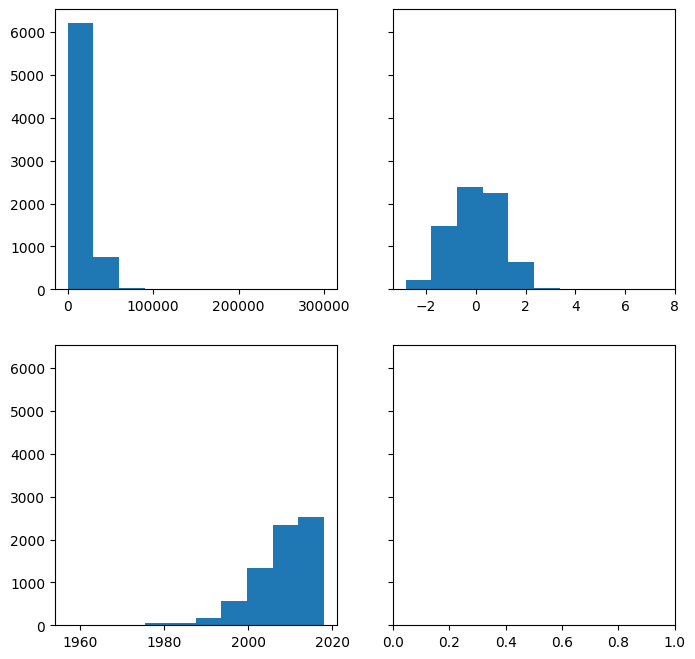

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
axs[0][0].hist(data['price'])
axs[1][0].hist(data['year'])
axs[0][1].hist(data_box_cox['transformed_price'])
axs[1][1].hist(data_box_cox['transformed_year'])

axs[0][0].set(title='price')
axs[0][1].set(title='box cox price')

axs[1][0].set(title='year')
axs[1][1].set(title='box cox year')

fig.suptitle('Сравнение распределений до трансформации и после')

plt.show()
